# pH regression & classification with SVM

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle
df = LoadData(34).load_data()
df = shuffle(df)
df.head()

no image
no image
no image
no image
no image
no image


,blue,green,red,label
387,59,1,213,0
195,24,38,168,1
192,200,1,63,13
365,94,173,0,8
51,73,183,77,6


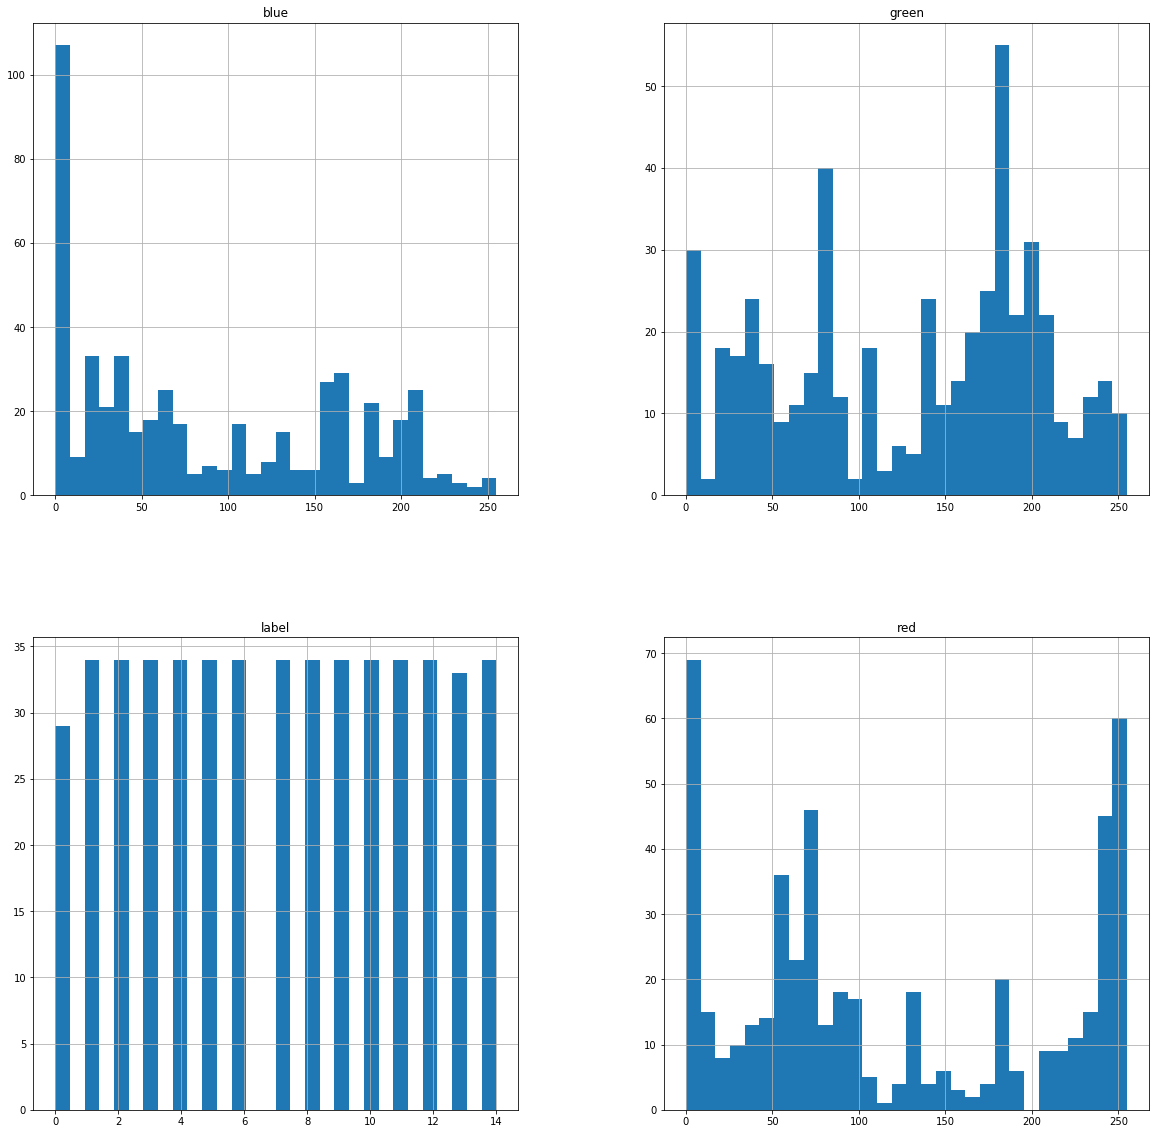

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=30,figsize=(20,20))
plt.show()

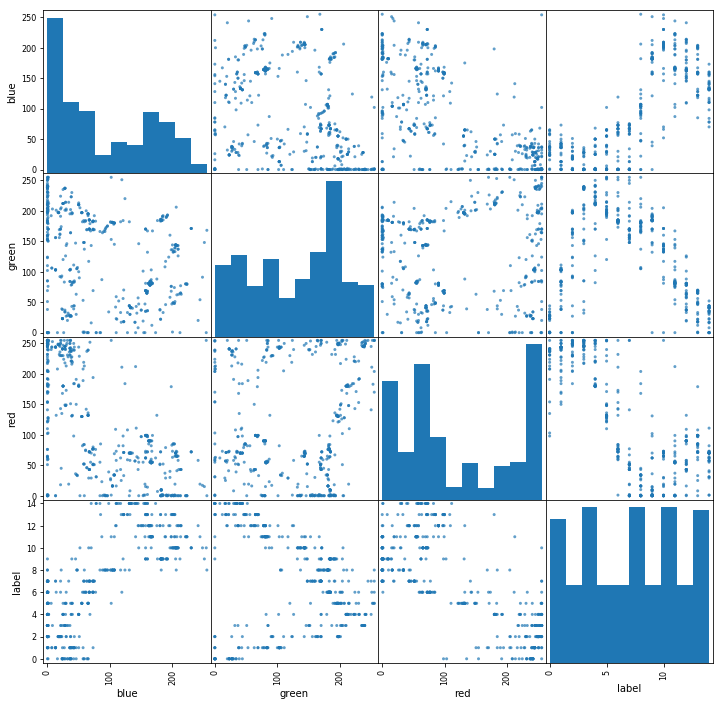

In [11]:
from pandas.plotting import scatter_matrix 
attributes = ['blue', 'green', 'red', 'label']
scatter_matrix(df[attributes], figsize=(12,12), alpha=0.7)
plt.show()

## Split data

In [42]:
X = df.drop('label', axis=1)
y = np.array(df['label'])
X.shape, y.shape

((504, 3), (504,))

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### LinearSVR

In [48]:
pipe_svm = Pipeline((
    ('scaler', StandardScaler()),
    ('lin_svr', LinearSVR(epsilon=1.5))
))
pipe_svm.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_svr', LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [49]:
y_predict = pipe_svm.predict(x_test)
def test(clf):
    accuracy = 0
    for i in range(len(x_test)):
        print('Predict {:.2f}, labels {}'.format(y_predict[i],y_test[i]))
test(pipe_svm)

Predict 9.45, labels 13
Predict 2.39, labels 3
Predict 11.37, labels 12
Predict 1.69, labels 4
Predict 11.38, labels 10
Predict 3.79, labels 4
Predict 9.18, labels 8
Predict 10.92, labels 10
Predict 2.07, labels 3
Predict 2.83, labels 4
Predict 9.24, labels 14
Predict 9.45, labels 13
Predict 3.10, labels 1
Predict 3.84, labels 5
Predict 2.16, labels 2
Predict 7.12, labels 6
Predict 5.87, labels 6
Predict 6.09, labels 8
Predict 8.93, labels 8
Predict 9.50, labels 8
Predict 11.76, labels 9
Predict 4.59, labels 5
Predict 11.08, labels 10
Predict 11.55, labels 11
Predict 2.31, labels 3
Predict 6.85, labels 6
Predict 11.54, labels 9
Predict 11.70, labels 12
Predict 8.03, labels 7
Predict 7.39, labels 7
Predict 11.54, labels 8
Predict 5.90, labels 5
Predict 2.31, labels 3
Predict 9.35, labels 13
Predict 10.86, labels 13
Predict 8.78, labels 14
Predict 11.78, labels 9
Predict 11.76, labels 9
Predict 2.88, labels 4
Predict 9.97, labels 14
Predict 2.13, labels 2
Predict 1.44, labels 3
Predict 1

### Measure mean_squared_error

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predict)

4.173205239340648

### Polynomial kernel

In [55]:
from sklearn.svm import SVR

pip_svr = Pipeline((
    ('scaler', StandardScaler()),
    ('lin_svr', SVR(kernel='poly', degree=3, C=100, epsilon=0.1))
))
pip_svr.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [56]:
y_predict_svr = pip_svr.predict(x_test)
mean_squared_error(y_test, y_predict_svr)

5.389317379640662

In [57]:
#

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.svm import SVC

svm_clf = SVC(decision_function_shape="ovr")
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=3.9456903375546153, gamma=0.0015864102263428658 ...............
[CV]  C=3.9456903375546153, gamma=0.0015864102263428658, total=   0.0s
[CV] C=3.9456903375546153, gamma=0.0015864102263428658 ...............
[CV]  C=3.9456903375546153, gamma=0.0015864102263428658, total=   0.0s
[CV] C=3.9456903375546153, gamma=0.0015864102263428658 ...............
[CV]  C=3.9456903375546153, gamma=0.0015864102263428658, total=   0.0s
[CV] C=1.0982963957353766, gamma=0.007967002864728229 ................
[CV] . C=1.0982963957353766, gamma=0.007967002864728229, total=   0.0s
[CV] C=1.0982963957353766, gamma=0.007967002864728229 ................
[CV] . C=1.0982963957353766, gamma=0.007967002864728229, total=   0.0s
[CV] C=1.0982963957353766, gamma=0.007967002864728229 ................
[CV] . C=1.0982963957353766, gamma=0.007967002864728229, total=   0.0s
[CV] C=10.475341280214911, gamma=0.0019647658322121536 ...............
[CV]  C=10.47534

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=2.842330525118606, gamma=0.017669135990157323, total=   0.0s
[CV] C=2.842330525118606, gamma=0.017669135990157323 .................
[CV] .. C=2.842330525118606, gamma=0.017669135990157323, total=   0.0s
[CV] C=2.842330525118606, gamma=0.017669135990157323 .................
[CV] .. C=2.842330525118606, gamma=0.017669135990157323, total=   0.0s
[CV] C=8.040880371780386, gamma=0.0034442219238711635 ................
[CV] . C=8.040880371780386, gamma=0.0034442219238711635, total=   0.0s
[CV] C=8.040880371780386, gamma=0.0034442219238711635 ................
[CV] . C=8.040880371780386, gamma=0.0034442219238711635, total=   0.0s
[CV] C=8.040880371780386, gamma=0.0034442219238711635 ................
[CV] . C=8.040880371780386, gamma=0.0034442219238711635, total=   0.0s
[CV] C=10.826471170111931, gamma=0.0039739523344709884 ...............
[CV]  C=10.826471170111931, gamma=0.0039739523344709884, total=   0.0s
[CV] C=10.826471170111931, gamma=0.0039739523344709884 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020223551B38>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020223551D68>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [62]:
rnd_search_cv.best_estimator_

SVC(C=10.738473187574147, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0010812684983373402,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
rnd_search_cv.best_score_

0.6997792494481236

In [64]:
rnd_search_cv.best_estimator_.fit(x_train, y_train)

SVC(C=10.738473187574147, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0010812684983373402,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
from sklearn.metrics import accuracy_score
y_pred_rnd = rnd_search_cv.best_estimator_.predict(x_test)
print(accuracy_score(y_test, y_pred_rnd))

0.8235294117647058


In [66]:
mean_squared_error(y_test, y_pred_rnd)

0.5294117647058824

### Save model

In [68]:
from sklearn.externals import joblib
# joblib.dump(rnd_search_cv, 'rnd_search_cv_82%.pkl')

['rnd_search_cv_82%.pkl']